# Data import
## Question 0 - Get common wikidata occupations

> Write a sparql query that retrieves the top 100 occupations on wikidata (wikidata property P106).

You may use the interface https://query.wikidata.org/ to try different queries. Here are some example sparql queries: https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples

In [1]:
query = """
SELECT ?o (COUNT(?person) AS ?count) WHERE 
{
   ?person wdt:P106 ?o
}
GROUP BY ?o
ORDER BY DESC(?count)
LIMIT 100
"""

The following assertion should pass if your answer is correct.

In [2]:
import requests

occupations = ['Q82955', 'Q937857', 'Q36180', 'Q33999', 'Q1650915', 'Q1028181', 'Q1930187', 'Q177220', 'Q1622272', 'Q49757', 'Q36834', 'Q40348', 'Q47064', 'Q639669', 'Q10800557', 'Q201788', 'Q2526255', 'Q43845', 'Q28389', 'Q42973', 'Q10871364', 'Q39631', 'Q193391', 'Q482980', 'Q483501', 'Q11513337', 'Q3665646', 'Q12299841', 'Q19204627', 'Q16533', 'Q81096', 'Q11774891', 'Q188094', 'Q1281618', 'Q333634', 'Q189290', 'Q250867', 'Q33231', 'Q2259451', 'Q42603', 'Q628099', 'Q37226', 'Q2309784', 'Q901', 'Q2066131', 'Q6625963', 'Q10798782', 'Q2374149', 'Q170790', 'Q4610556', 'Q185351', 'Q486748', 'Q3055126', 'Q753110', 'Q4964182', 'Q169470', 'Q158852', 'Q1234713', 'Q14089670', 'Q10873124', 'Q3282637', 'Q593644', 'Q947873', 'Q13414980', 'Q131524', 'Q11338576', 'Q15117302', 'Q488205', 'Q14467526', 'Q183945', 'Q10843402', 'Q13382576', 'Q13141064', 'Q214917', 'Q855091', 'Q644687', 'Q19595175', 'Q121594', 'Q2865819', 'Q16010345', 'Q1231865', 'Q2405480', 'Q350979', 'Q3400985', 'Q13365117', 'Q10833314', 'Q3621491', 'Q15981151', 'Q212980', 'Q16145150', 'Q1792450', 'Q15296811', 'Q15627169', 'Q2306091', 'Q4263842', 'Q806798', 'Q5716684', 'Q2516866', 'Q3387717', 'Q131512']

def evalSparql(query):
    return requests.post('https://query.wikidata.org/sparql', data=query, headers={
        'content-type': 'application/sparql-query',
        'accept': 'application/json',
        'user-agent': 'User:Tpt'
    }).json()['results']['bindings']

myOccupations = [val['o']['value'].replace('http://www.wikidata.org/entity/', '') 
                 for val in evalSparql(query)]
assert(frozenset(occupations) == frozenset(myOccupations))

## Occupations labels

We load the labels of the occupations from Wikidata

In [3]:
occupations_label = {}

query = """
SELECT DISTINCT ?o ?oLabel 
WHERE { 
    VALUES ?o { %s } 
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}"""% ' '.join('wd:' + o for o in occupations)

for result in evalSparql(query):
    occupations_label[result['o']['value'].replace('http://www.wikidata.org/entity/', '')] = result['oLabel']['value']

print(occupations_label)

{'Q82955': 'politician', 'Q121594': 'professor', 'Q177220': 'singer', 'Q169470': 'physicist', 'Q170790': 'mathematician', 'Q81096': 'engineer', 'Q201788': 'historian', 'Q188094': 'economist', 'Q212980': 'psychologist', 'Q214917': 'playwright', 'Q131524': 'entrepreneur', 'Q183945': 'record producer', 'Q193391': 'diplomat', 'Q189290': 'military officer', 'Q185351': 'jurist', 'Q350979': 'zoologist', 'Q483501': 'artist', 'Q482980': 'author', 'Q333634': 'translator', 'Q158852': 'conductor', 'Q486748': 'pianist', 'Q488205': 'singer-songwriter', 'Q250867': 'Catholic priest', 'Q593644': 'chemist', 'Q639669': 'musician', 'Q644687': 'illustrator', 'Q628099': 'association football manager', 'Q855091': 'guitarist', 'Q937857': 'association football player', 'Q947873': 'television presenter', 'Q806798': 'banker', 'Q1028181': 'painter', 'Q753110': 'songwriter', 'Q1234713': 'theologian', 'Q1281618': 'sculptor', 'Q1622272': 'university teacher', 'Q1792450': 'art historian', 'Q1650915': 'researcher', 'Q

We load *all* the labels of the occupations from Wikipedia

In [4]:
occupations_labels = {k: [v] for k, v in occupations_label.items()}

query = """
SELECT ?o ?altLabel 
WHERE {
  VALUES ?o { %s }
  ?o skos:altLabel ?altLabel . FILTER (lang(?altLabel) = "en")
}""" % ' '.join('wd:' + o for o in occupations) 

for result in evalSparql(query):
    occupations_labels[result['o']['value'].replace('http://www.wikidata.org/entity/', '')].append(result['altLabel']['value'])

print(occupations_labels)

{'Q82955': ['politician', 'political leader', 'polit.', 'political figure'], 'Q121594': ['professor', 'Prof.'], 'Q177220': ['singer', 'vocalist'], 'Q169470': ['physicist'], 'Q170790': ['mathematician'], 'Q81096': ['engineer'], 'Q201788': ['historian', 'historians', 'historiographer'], 'Q188094': ['economist'], 'Q212980': ['psychologist'], 'Q214917': ['playwright', 'Playwright, dramatist', 'dramatist', 'scriptwriter', 'playwrite'], 'Q131524': ['entrepreneur'], 'Q183945': ['record producer', 'music producer'], 'Q193391': ['diplomat'], 'Q189290': ['military officer', 'army officer', 'officer'], 'Q185351': ['jurist'], 'Q350979': ['zoologist', 'zooligist'], 'Q483501': ['artist'], 'Q482980': ['author'], 'Q333634': ['translator'], 'Q158852': ['conductor', 'Conducting'], 'Q486748': ['pianist'], 'Q488205': ['singer-songwriter', 'singer/songwriter', 'singer songwriter', 'singersongwriter'], 'Q250867': ['Catholic priest', 'Roman Catholic priest', 'Catholic presbyter', 'Roman Catholic presbyter'],

## Wikipedia articles

Here we load the training and the testing sets. To save memory space we use a generator that will read the file each time we iterate over the training or the testing examples.

In [5]:
import gzip
import json

def loadJson(filename):
    with gzip.open(filename, 'rt') as fp:
        for line in fp:
            yield json.loads(line)

class MakeIter(object):
    def __init__(self, generator_func, **kwargs):
        self.generator_func = generator_func
        self.kwargs = kwargs
    def __iter__(self):
        return self.generator_func(**self.kwargs)

training_set = MakeIter(loadJson, filename='wiki-train.json.gz')
testing_set = MakeIter(loadJson, filename='wiki-test.json.gz')

# Extract occupations from summaries

## Task 1 - Dictionnary extraction

> Using ```occupations_labels``` dictionnary, identify all occupations for each articles. Complete the function below to evaluate the accuracy of such approach. It will serve as a baseline.

In [6]:
label_to_occ = dict()
for key, occs in occupations_labels.items():
    for occ in occs:
        label_to_occ[occ.lower()] = key

def predict_dictionnary(example, occupations_labels):
    occs = []
    summary = example['summary'].lower()
    labels = label_to_occ.keys()
    for label in labels:
        if label in summary:
            occs.append(label_to_occ[label])
    return occs
    
def evaluate_dictionnary(training_set, occupations_labels):
    nexample = 0
    accuracy = 0.
    prediction = None
    for example in training_set:
        prediction = predict_dictionnary(example, occupations_labels)
        p = frozenset(prediction)
        g = frozenset(example['occupations'])
        accuracy += 1.*len(p & g) / len(p | g)
        nexample += 1
    return accuracy / nexample

evaluate_dictionnary(training_set, occupations_labels)

0.4842586814146957

## Task 2 - Simple neural network

We load the articles "summary" and we take the average of the word vectors.
This is done with spacy loaded with the fast text vectors.
To do the installation/loading [takes 8-10 minutes, dl 1.2Go]
```
pip3 install spacy
wget https://s3-us-west-1.amazonaws.com/fasttext-vectors/cc.en.300.vec.gz
python3 -m spacy init-model en /tmp/en_vectors_wiki_lg --vectors-loc cc.en.300.vec.gz
rm cc.en.300.vec.gz
```

In [ ]:
import spacy
from sklearn.model_selection import train_test_split

nlp = spacy.load('/tmp/en_vectors_wiki_lg')

def vectorize(dataset, nlp):
    result = {}
    for example in dataset:
        doc = nlp(example['summary'], disable=['parser', 'tagger'])
        result[example['title']] = {}
        result[example['title']]['vector'] = doc.vector
        result[example['title']]['summary'] = example['summary']
        if 'occupations' in example:
            result[example['title']]['occupations'] = example['occupations']
    return result
    
vectorized_training = vectorize(training_set, nlp)
vectorized_testing = vectorize(testing_set, nlp)
nlp = None

In [9]:
len(vectorized_training)

427798

In [10]:
v = vectorized_training['George_Washington']['vector']
print(v)

[-1.45162819e-02 -2.45802402e-02 -4.59302496e-03 -4.09372151e-02
 -4.47662771e-02 -4.18604538e-03 -3.15232435e-03 -1.44802360e-02
 -1.68499984e-02 -3.69651243e-03 -1.16255814e-02  1.43651171e-02
  2.02674349e-03 -5.88953542e-03 -2.17011590e-02  1.02302311e-02
 -2.49313917e-02 -5.65232616e-03 -2.25581434e-02  8.29069968e-03
 -1.44069805e-03  2.25197673e-02 -6.81395701e-04 -1.37232570e-02
 -1.26674427e-02 -3.35569866e-02  1.10627888e-02 -2.37208814e-03
 -2.30000000e-02  7.58616179e-02 -5.03487710e-04 -2.51116175e-02
  9.26511642e-03 -2.52558179e-02 -1.51058156e-02 -9.51627828e-03
  1.17523270e-02  1.22441910e-03  1.08139520e-03  3.39302444e-03
  2.20116391e-03  1.46860480e-02 -1.43686021e-02  5.76395402e-03
  1.74162779e-02 -4.76220921e-02 -1.72569733e-02 -1.49988411e-02
 -1.77732538e-02  1.58907007e-02 -7.23255938e-03  2.43825577e-02
 -2.73104683e-02 -3.67430188e-02 -1.48802334e-02 -1.34825567e-02
 -3.14348824e-02  1.95930228e-02 -6.68605033e-04 -9.24302172e-03
  1.56976283e-04 -1.65674

In [11]:
v.shape

(300,)

## Split the vectorized_training into train and test set

In [12]:
def splitDict(d, percent):
    split_idx = int(len(d) * percent)
    d1 = dict(list(d.items())[: split_idx])
    d2 = dict(list(d.items())[split_idx:])                

    return d1, d2

vectorized_training_test, vectorized_training_train = splitDict(vectorized_training, 0.1)

In [13]:
len(vectorized_training_train)

385019

In [14]:
# We encode the data
import numpy as np

def encode_data(vectorized_data):
    X = np.array([vectorized_data[article]['vector'] for article in vectorized_data])
    y = np.array([[(1 if occupation in vectorized_data[article]['occupations'] else 0)
                        for occupation in occupations ] for article in vectorized_data])
    return X, y

X_train, y_train = encode_data(vectorized_training_train)
X_test, y_test = encode_data(vectorized_training_test)

In [15]:
print(len(y_train[0]))

100


In [16]:
X_train.shape

(385019, 300)

In [17]:
y_train.shape

(385019, 100)

> Using keras, define a sequential neural network with two layers. Use categorical_crossentropy as a loss function and softmax as the activation function of the output layer

You can look into the documentation here: https://keras.io/getting-started/sequential-model-guide/

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(512, activation='relu', input_dim=300))
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))

optimizer = Adam()
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



Using TensorFlow backend.


In [19]:
history = model.fit(X_train, y_train, epochs=50, batch_size=1024, validation_split=0.1)

Train on 346517 samples, validate on 38502 samples
Epoch 1/50
346517/346517 [==============================] - 3s 10us/step - loss: 3.4467 - acc: 0.5043 - val_loss: 2.0377 - val_acc: 0.6464
Epoch 2/50
346517/346517 [==============================] - 1s 4us/step - loss: 2.3634 - acc: 0.6634 - val_loss: 1.7669 - val_acc: 0.6960
Epoch 3/50
346517/346517 [==============================] - 1s 4us/step - loss: 2.1769 - acc: 0.6908 - val_loss: 1.6653 - val_acc: 0.7075
Epoch 4/50
346517/346517 [==============================] - 1s 4us/step - loss: 2.0829 - acc: 0.7043 - val_loss: 1.6013 - val_acc: 0.7304
Epoch 5/50
346517/346517 [==============================] - 2s 4us/step - loss: 2.0235 - acc: 0.7131 - val_loss: 1.5702 - val_acc: 0.7286
Epoch 6/50
346517/346517 [==============================] - 1s 4us/step - loss: 1.9830 - acc: 0.7182 - val_loss: 1.5240 - val_acc: 0.7393
Epoch 7/50
346517/346517 [==============================] - 1s 4us/step - loss: 1.9497 - acc: 0.7229 - val_loss: 1.5029 

> Complete the function predict: output the list of occupations where the corresponding neuron on the output layer of our model has a value > 0.1

In [20]:
def predict_nn(model, article_name, vectorized_dataset):
    input_vector = vectorized_dataset[article_name]['vector'].reshape((1, 300))
    scores = model.predict(input_vector).reshape(100)
    predictions = np.where(scores > 0.1)[0]
#     print(scores[predictions])
    return set(np.array(occupations)[predictions])

print(predict_nn(model, 'Elvis_Presley', vectorized_training))
# should be {'Q177220'}

{'Q639669', 'Q33999', 'Q177220'}


In [21]:
def evaluate_nn(vectorized_training, model):
    nexample = 0
    accuracy = 0.
    prediction = None
    for article_name in vectorized_training:
        prediction = predict_nn(model, article_name, vectorized_training)
        p = frozenset(prediction)
        g = frozenset(vectorized_training[article_name]['occupations'])
        accuracy += 1.*len(p & g) / len(p | g)
        nexample += 1
    return accuracy / nexample

In [22]:
print(evaluate_nn(vectorized_training_train, model))
print(evaluate_nn(vectorized_training_test, model))

0.698508658729491
0.6544649581232717


## Task 3 Your approach: CNN + BiRNN

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, GRU, Dropout, Conv1D, MaxPooling1D, MaxPooling1D, Bidirectional, BatchNormalization, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import spacy

Using TensorFlow backend.


In [7]:
# Extract the dataset into summaries, titles and occupations
def parse(dataset):
    titles = []
    summaries = []
    occs = []
    ml = 0 
    for example in dataset:
        titles.append(example['title'])
        summaries.append(example['summary'].lower())        
        ml = max(len(example['summary']), ml)
        if 'occupations' in example:
            occs.append(example['occupations'])
        else:
            occs.append([])
    return titles, summaries, occs
    
titles_train, summaries_train, occs_train = parse(training_set)
titles_test, summaries_test, occs_test = parse(testing_set)

# split the training_set into train and test set 
s = int(len(titles_train) * 0.8)
titles_train_train, summaries_train_train, occs_train_train = titles_train[:s], summaries_train[:s], occs_train[:s]
titles_train_test, summaries_train_test, occs_train_test = titles_train[s:], summaries_train[s:], occs_train[s:]



In [8]:
n_samples = len(titles_train_train)
maxlen = 300
training_samples = int(n_samples * 0.9)
validation_samples = n_samples - training_samples
max_words = 100000 # we only use the most 100,000 common words

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(summaries_train_train)

# convert text to sequences
sequences =  tokenizer.texts_to_sequences(summaries_train_train)
sequences_test = tokenizer.texts_to_sequences(summaries_train_test)

word_index = tokenizer.word_index
print('Found', len(word_index), 'unique tokens.')



Found 370295 unique tokens.


In [9]:
def convert_occs_to_labels(occupations, occs_train):
    labels = []
    for i in range(len(occs_train)):
        label = []
        
        for occ in occupations:
            if occ in occs_train[i]:
                label.append(1)
            else:
                label.append(0)
        labels.append(label)
    return np.array(labels)


In [10]:
# pad the sequences so all the sequences have the same length
data = pad_sequences(sequences, maxlen=maxlen)
data_test = pad_sequences(sequences_test, maxlen=maxlen)

# encode the occupations
labels = convert_occs_to_labels(occupations, occs_train_train)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# shuffle the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# split into training and validation set
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Shape of data tensor: (342333, 300)
Shape of label tensor: (342333, 100)


In [11]:
glove_dir = 'glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.42B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found', len(embeddings_index), 'word vectors.')

Found 1917494 word vectors.


In [12]:
# Build embedding matrix to load into embedding layer
embedding_dim = 300
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [13]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(Conv1D(64,kernel_size=3,padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.1))

model.add(Conv1D(128,kernel_size=3,padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.1))

model.add(Conv1D(256,kernel_size=3,padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.1))


model.add(Bidirectional(GRU(64, return_sequences=True, recurrent_dropout = 0.1, dropout = 0.1)))

model.add(Bidirectional(GRU(64, return_sequences=True, recurrent_dropout = 0.1, dropout = 0.1)))

model.add(Bidirectional(GRU(64, return_sequences=True, recurrent_dropout = 0.1, dropout = 0.1)))

model.add(Bidirectional(GRU(64, recurrent_dropout = 0.1, dropout = 0.1)))

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


# model.add(Dense(100, activation='softmax'))
model.add(Dense(100, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          30000000  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 64)           57664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 300, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 100, 64)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 100, 128)          24704     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 128)          512       
__________

In [14]:
# Load the embedding in the model
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False # we will not train this layer

In [15]:
model.load_weights("model3.h5")

In [21]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfb
from keras import backend as K

POS_WEIGHT = 10  # multiplier for positive targets

def weighted_binary_crossentropy(target, output):
    # transform back to logits
    _epsilon = tfb._to_tensor(tfb.epsilon(), output.dtype.base_dtype)
    output = tf.clip_by_value(output, _epsilon, 1 - _epsilon)
    output = tf.log(output / (1 - output))
    # compute weighted loss
    loss = tf.nn.weighted_cross_entropy_with_logits(targets=target,
                                                    logits=output,
                                                    pos_weight=POS_WEIGHT)
    return tf.reduce_mean(loss, axis=-1)



In [23]:
callbacks = [
    EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=1, mode='auto'),
    ReduceLROnPlateau(monitor='val_loss', 
                      factor=0.1, 
                      patience=5, 
                      verbose=1, 
                      mode='auto', 
                      min_delta=0.0001, 
                      cooldown=0, 
                      min_lr=0),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, verbose=1, mode='min')
]

model.compile(optimizer='rmsprop',
    loss=weighted_binary_crossentropy, # give more weight to the 1-label
    metrics=['acc'])

history = model.fit(x_train, y_train,
    epochs=200,
    callbacks=callbacks,
    batch_size=2000,
    validation_data=(x_val, y_val))

Train on 308099 samples, validate on 34234 samples
Epoch 1/200
308099/308099 [==============================] - 81s 263us/step - loss: 0.0757 - acc: 0.7635 - val_loss: 0.0704 - val_acc: 0.7675

Epoch 00001: val_loss improved from inf to 0.07041, saving model to best_model.h5
Epoch 2/200
308099/308099 [==============================] - 71s 230us/step - loss: 0.0750 - acc: 0.7643 - val_loss: 0.0723 - val_acc: 0.7710

Epoch 00002: val_loss did not improve from 0.07041
Epoch 3/200
308099/308099 [==============================] - 70s 227us/step - loss: 0.0747 - acc: 0.7652 - val_loss: 0.0720 - val_acc: 0.7705

Epoch 00003: val_loss did not improve from 0.07041
Epoch 4/200
308099/308099 [==============================] - 70s 228us/step - loss: 0.0744 - acc: 0.7651 - val_loss: 0.0743 - val_acc: 0.7698

Epoch 00004: val_loss did not improve from 0.07041
Epoch 5/200
308099/308099 [==============================] - 70s 228us/step - loss: 0.0742 - acc: 0.7658 - val_loss: 0.0723 - val_acc: 0.7750


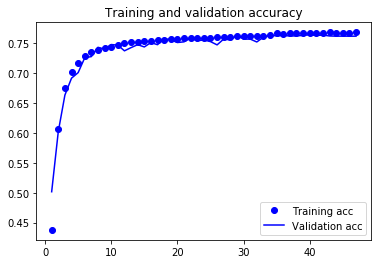

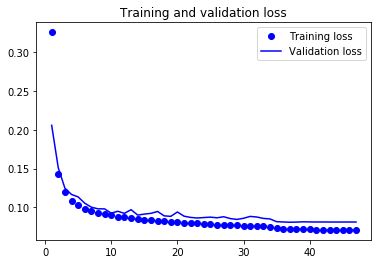

In [49]:
# Plot the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
def predict_nn_2(model, input_vector, print_score = False):
    
    scores = model.predict(input_vector).reshape(100)
    predictions1 = np.where(scores > 0.6)[0]
    predictions2 = np.where(scores > 0.7)[0]
    predictions3 = np.where(scores > 0.8)[0]
    predictions4 = np.where(scores > 0.9)[0]
    predictions5 = np.where(scores > 0.95)[0]
    predictions6 = np.where(scores > 0.99)[0]
    if print_score:
        print(scores[predictions1])
        print(scores[predictions2])
        print(scores[predictions3])
        print(scores[predictions4])
        print(scores[predictions5])
        print(scores[predictions6])
    res1 = set(np.array(occupations)[predictions1])
    res2 = set(np.array(occupations)[predictions2])
    res3 = set(np.array(occupations)[predictions3])
    res4 = set(np.array(occupations)[predictions4])
    res5 = set(np.array(occupations)[predictions5])
    res6 = set(np.array(occupations)[predictions6])
    return res1, res2, res3, res4, res5, res6


In [26]:
len(titles_train_test)

85584

In [27]:
def evaluate_nn_2(titles, input_vectors, occs, model):
    nexample = len(titles)
    accuracy1 = 0.
    accuracy2 = 0.
    accuracy3 = 0.
    accuracy4 = 0.
    accuracy5 = 0.
    accuracy6 = 0.
    prediction = None
    for i in range(len(titles)):        
        input_vector = input_vectors[i].reshape(1, -1)
        prediction1, prediction2, prediction3, prediction4, prediction5, prediction6 = predict_nn_2(model, input_vector)
        p1 = frozenset(prediction1)
        p2 = frozenset(prediction2)
        p3 = frozenset(prediction3)
        p4 = frozenset(prediction4)
        p5 = frozenset(prediction5)
        p6 = frozenset(prediction6)
        g = frozenset(occs[i])
        accuracy1 += 1. / nexample * len(p1 & g) / len(p1 | g)
        accuracy2 += 1. / nexample * len(p2 & g) / len(p2 | g)
        accuracy3 += 1. / nexample * len(p3 & g) / len(p3 | g)
        accuracy4 += 1. / nexample * len(p4 & g) / len(p4 | g)
        accuracy5 += 1. / nexample * len(p5 & g) / len(p5 | g)
        accuracy6 += 1. / nexample * len(p6 & g) / len(p6 | g)
        if i % 1000 == 0:
            print("=========================")
            print(round(i / nexample, 4))
            print("0.6 : ", round(accuracy1, 4))
            print("0.7 : ", round(accuracy2, 4))
            print("0.8 : ", round(accuracy3, 4))
            print("0.9 : ", round(accuracy4, 4))
            print("0.95 : ", round(accuracy5, 4))
            print("0.99 : ", round(accuracy6, 4))
    return accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6

# print(evaluate_nn_2(titles_train, summaries_train, occs_train, model))
print(evaluate_nn_2(titles_train_test, data_test, occs_train_test, model))

0.0
0.6 :  0.0
0.7 :  0.0
0.8 :  0.0
0.9 :  0.0
0.95 :  0.0
0.99 :  0.0
0.0117
0.6 :  0.0081
0.7 :  0.0085
0.8 :  0.0088
0.9 :  0.0088
0.95 :  0.0084
0.99 :  0.0064
0.0234
0.6 :  0.0162
0.7 :  0.0171
0.8 :  0.0176
0.9 :  0.0176
0.95 :  0.0168
0.99 :  0.0129
0.0351
0.6 :  0.0242
0.7 :  0.0254
0.8 :  0.0262
0.9 :  0.0265
0.95 :  0.0251
0.99 :  0.0191
0.0467
0.6 :  0.0323
0.7 :  0.0338
0.8 :  0.0351
0.9 :  0.0354
0.95 :  0.0337
0.99 :  0.0258
0.0584
0.6 :  0.0402
0.7 :  0.042
0.8 :  0.0437
0.9 :  0.0441
0.95 :  0.0421
0.99 :  0.032
0.0701
0.6 :  0.0482
0.7 :  0.0505
0.8 :  0.0525
0.9 :  0.0531
0.95 :  0.0506
0.99 :  0.0383
0.0818
0.6 :  0.0566
0.7 :  0.0592
0.8 :  0.0615
0.9 :  0.0622
0.95 :  0.0593
0.99 :  0.0453
0.0935
0.6 :  0.0646
0.7 :  0.0676
0.8 :  0.0701
0.9 :  0.071
0.95 :  0.0679
0.99 :  0.0515
0.1052
0.6 :  0.0728
0.7 :  0.0761
0.8 :  0.079
0.9 :  0.08
0.95 :  0.0765
0.99 :  0.0583
0.1168
0.6 :  0.0809
0.7 :  0.0846
0.8 :  0.0877
0.9 :  0.0887
0.95 :  0.0847
0.99 :  0.0648
0.12

0.8179
0.6 :  0.5678
0.7 :  0.5916
0.8 :  0.6107
0.9 :  0.6151
0.95 :  0.5852
0.99 :  0.4546
0.8296
0.6 :  0.5762
0.7 :  0.6004
0.8 :  0.6198
0.9 :  0.6244
0.95 :  0.5941
0.99 :  0.4618
0.8413
0.6 :  0.5839
0.7 :  0.6085
0.8 :  0.6282
0.9 :  0.6329
0.95 :  0.6021
0.99 :  0.4679
0.853
0.6 :  0.592
0.7 :  0.6168
0.8 :  0.6369
0.9 :  0.6416
0.95 :  0.6105
0.99 :  0.4743
0.8646
0.6 :  0.6005
0.7 :  0.6257
0.8 :  0.646
0.9 :  0.6508
0.95 :  0.6193
0.99 :  0.4813
0.8763
0.6 :  0.6095
0.7 :  0.635
0.8 :  0.6555
0.9 :  0.6604
0.95 :  0.6286
0.99 :  0.4894
0.888
0.6 :  0.6177
0.7 :  0.6435
0.8 :  0.6644
0.9 :  0.6694
0.95 :  0.6372
0.99 :  0.4963
0.8997
0.6 :  0.6264
0.7 :  0.6525
0.8 :  0.6736
0.9 :  0.6787
0.95 :  0.6463
0.99 :  0.5041
0.9114
0.6 :  0.6349
0.7 :  0.6613
0.8 :  0.6827
0.9 :  0.6878
0.95 :  0.655
0.99 :  0.5115
0.9231
0.6 :  0.6435
0.7 :  0.6702
0.8 :  0.6918
0.9 :  0.697
0.95 :  0.6639
0.99 :  0.519
0.9348
0.6 :  0.6523
0.7 :  0.6793
0.8 :  0.7012
0.9 :  0.7065
0.95 :  0.673
0

In [46]:
model.save_weights('model3.h5')

In [16]:
def predict_nn_3(model, input_vector, print_score = False):
    
    scores = model.predict(input_vector).reshape(100)
    predictions = np.where(scores > 0.9)[0]
    res = set(np.array(occupations)[predictions])
    return res


In [19]:
from IPython.display import clear_output, display
import time

sequences_res = tokenizer.texts_to_sequences(summaries_test)
data_res = pad_sequences(sequences_res, maxlen=maxlen)

def export(start=0):
    with gzip.open('results.json.gz', 'wt') as output:
        for i in range(start, len(titles_test)):    
            input_vector = data_res[i].reshape(1, -1)
            prediction = predict_nn_3(model, input_vector)
            sol = list(prediction)            
            output.write(json.dumps({'title':titles_test[i], 'prediction': sol}) + "\n")
            
            clear_output(wait=True)
            print(i,"/", len(titles_test), " - ", i * 100 / len(titles_test), "%")

export(253165)

253164 / 643108  -  39.365705293667624 %


KeyboardInterrupt: 

***IMPORTANT*** Output format of requested file 'results.json.gz': each line must be a json string representing a dictionnary:
> ```{ 'title': THE_ARTICLE_NAME, 'prediction': [THE_LIST_OF_OCCUPATIONS]}```

In [ ]:
# For example if testset_solutions is a dictionnary: article_name (key) -> prediction_list (value) use this function:
def export(testset_solutions):
    with gzip.open('results.json.gz', 'wt') as output:
        for article in testset_solutions:
            output.write(json.dumps({'title':article, 'prediction':testset_solutions[article]}) + "\n")